In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score

In [4]:
train_data = pd.read_csv('creditcard.csv')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
train_data = train_data.dropna()

In [7]:
# number of attack labels 
train_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

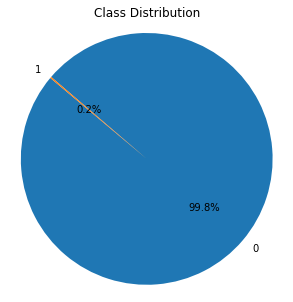

In [8]:
labels = train_data['Class'].value_counts().index
sizes = train_data['Class'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Class Distribution')
plt.show()

Text(0.5, 1, 'Correlation Matrix')

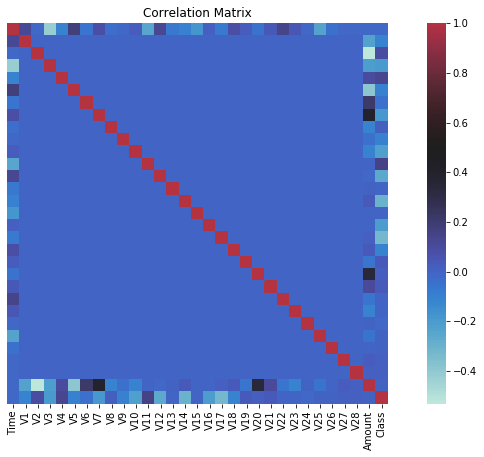

In [9]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(train_data.corr(), square=True, center=0.5, yticklabels=False).set_title('Correlation Matrix')

In [10]:
X = train_data.drop(["Class"],axis =1)
y = train_data["Class"]

In [11]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

selector = SelectPercentile(mutual_info_classif, percentile=35)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape


(284807, 11)

In [12]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

In [13]:
df = train_data[['V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18',
                  'Class']]
df.to_csv('processed.csv')

In [14]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y, test_size=0.20, random_state=42)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import sensitivity_score, specificity_score

In [78]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
sens = []
spec = []
rocauc = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    sens.append(round(e, 3))
    spec.append(round(f, 3))
    rocauc.append(round(g, 3))

In [79]:
ML_Model1 = []
accuracy1 = []
precision1 = []
recall1 = []
f1score1 = []
sens1 = []
spec1 = []
rocauc1 = []

#function to call for storing the results
def storeResults1(model, a,b,c,d,e,f,g):
    ML_Model1.append(model)
    accuracy1.append(round(a, 3))
    precision1.append(round(b, 3))
    recall1.append(round(c, 3))
    f1score1.append(round(d, 3))
    sens1.append(round(e, 3))
    spec1.append(round(f, 3))
    rocauc1.append(round(g, 3))

# ML

# AdaBoost

In [16]:
from sklearn.ensemble import AdaBoostClassifier

# instantiate the model 
ada = AdaBoostClassifier(n_estimators=100, random_state=0)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

ada_acc = accuracy_score(y_pred, y_test)
ada_prec = precision_score(y_pred, y_test,average='weighted')
ada_rec = recall_score(y_pred, y_test,average='weighted')
ada_f1 = f1_score(y_pred, y_test,average='weighted')
ada_sens = sensitivity_score(y_pred, y_test,average='weighted')
ada_spec = specificity_score(y_pred, y_test,average='weighted')
ada_roc = roc_auc_score(y_test, ada.predict_proba(X_test)[:, 1])

In [80]:
storeResults('AdaBoost',ada_acc,ada_prec,ada_rec,ada_f1,ada_sens,ada_spec,ada_roc)

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
forest = RandomForestClassifier(max_depth=2, random_state=0)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')
rf_sens = sensitivity_score(y_pred, y_test,average='weighted')
rf_spec = specificity_score(y_pred, y_test,average='weighted')
rf_roc = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])

In [81]:
storeResults('Random FOrest',rf_acc,rf_prec,rf_rec,rf_f1,rf_sens,rf_spec,rf_roc)

# MLP Classifier

In [18]:
from sklearn.neural_network import MLPClassifier

# instantiate the model 
mlp = MLPClassifier(random_state=1, max_iter=30)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_pred, y_test)
mlp_prec = precision_score(y_pred, y_test,average='weighted')
mlp_rec = recall_score(y_pred, y_test,average='weighted')
mlp_f1 = f1_score(y_pred, y_test,average='weighted')
mlp_sens = sensitivity_score(y_pred, y_test,average='weighted')
mlp_spec = specificity_score(y_pred, y_test,average='weighted')
mlp_roc = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])

In [82]:
storeResults('MLP',mlp_acc,mlp_prec,mlp_rec,mlp_f1,mlp_sens,mlp_spec,mlp_roc)

# Stacking  Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10)),('mlp', MLPClassifier(random_state=1, max_iter=30))]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))


clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')
stac_sens = sensitivity_score(y_pred, y_test,average='weighted')
stac_spec = specificity_score(y_pred, y_test,average='weighted')
stac_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

In [114]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1,stac_sens,stac_spec,stac_roc)

# Voting Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf1 = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')
vot_sens = sensitivity_score(y_pred, y_test,average='weighted')
vot_spec = specificity_score(y_pred, y_test,average='weighted')
vot_roc = roc_auc_score(y_test, eclf1.predict_proba(X_test)[:, 1])

In [115]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1,vot_sens,vot_spec,vot_roc)

DL

In [21]:
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import LSTM,GRU, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [22]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_reduced)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)

In [24]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
train_X=X_train
val_X=X_test

In [25]:
## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))

In [26]:
## Recuperation des labels
train_y=y_train
val_y=y_test

In [27]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

# LSTM

In [28]:
inputs1=Input((1,11))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [29]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history=model1.fit(train_X, train_y,epochs=5,batch_size=2, validation_data=(val_X, val_y))

Epoch 1/5
99682/99682 [==============================] - 355s 3ms/step - loss: 0.0105 - accuracy: 0.9989 - val_loss: 0.0041 - val_accuracy: 0.9995
Epoch 2/5
99682/99682 [==============================] - 323s 3ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 3/5
99682/99682 [==============================] - 322s 3ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 4/5
99682/99682 [==============================] - 323s 3ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 5/5
99682/99682 [==============================] - 323s 3ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9994


In [31]:
# evaluate the model
_, train_acc = model1.evaluate(train_X, train_y, verbose=0)
_, test_acc = model1.evaluate(val_X, val_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.999, Test: 0.999


In [32]:
y_pred = model1.predict(val_X, verbose=1)
y_pred = np.argmax(y_pred,axis=1)
lstm_acc = accuracy_score(y_pred, val_y)
lstm_prec = precision_score(y_pred, val_y,average='weighted')
lstm_rec = recall_score(y_pred, val_y,average='weighted')
lstm_f1 = f1_score(y_pred, val_y,average='weighted')
lstm_sens = sensitivity_score(y_pred, val_y,average='weighted')
lstm_spec = specificity_score(y_pred, val_y,average='weighted')
lstm_roc = roc_auc_score(train_y, model1.predict(train_X, verbose=1))

6231/6231 [==============================] - 8s 1ms/step


In [83]:
storeResults('LSTM',lstm_acc,lstm_prec,lstm_rec,lstm_f1,lstm_sens,lstm_spec,lstm_roc)

In [34]:
from matplotlib import pyplot

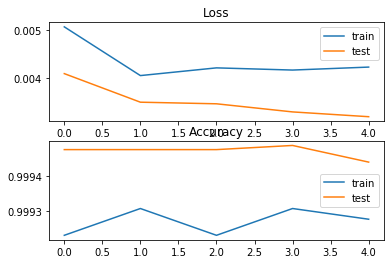

In [35]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# GRU

In [36]:
inputs1=Input((1,11))
att_in=GRU(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=GRU(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [37]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history=model1.fit(train_X, train_y,epochs=5,batch_size=2, validation_data=(val_X, val_y))

Epoch 1/5
99682/99682 [==============================] - 300s 3ms/step - loss: 0.0091 - accuracy: 0.9988 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 2/5
99682/99682 [==============================] - 293s 3ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 3/5
99682/99682 [==============================] - 300s 3ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0045 - val_accuracy: 0.9982
Epoch 4/5
99682/99682 [==============================] - 300s 3ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 5/5
99682/99682 [==============================] - 299s 3ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9995


In [39]:
# evaluate the model
_, train_acc = model1.evaluate(train_X, train_y, verbose=0)
_, test_acc = model1.evaluate(val_X, val_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.999, Test: 0.999


In [40]:
y_pred = model1.predict(val_X, verbose=1)
y_pred = np.argmax(y_pred,axis=1)
gru_acc = accuracy_score(y_pred, val_y)
gru_prec = precision_score(y_pred, val_y,average='weighted')
gru_rec = recall_score(y_pred, val_y,average='weighted')
gru_f1 = f1_score(y_pred, val_y,average='weighted')
gru_sens = sensitivity_score(y_pred, val_y,average='weighted')
gru_spec = specificity_score(y_pred, val_y,average='weighted')
gru_roc = roc_auc_score(train_y, model1.predict(train_X, verbose=1))

6231/6231 [==============================] - 7s 1ms/step


In [84]:
storeResults('GRU',gru_acc,gru_prec,gru_rec,gru_f1,gru_sens,gru_spec,gru_roc)

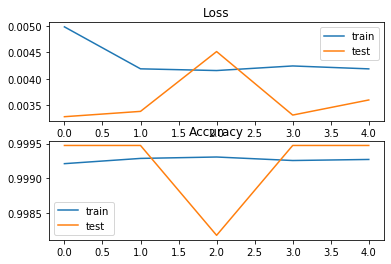

In [41]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# LSTM + GRU with NN(MLP)

In [42]:
inputs1=Input((1,11))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=GRU(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs = Dense(8, activation='relu')(att_out)
outputs = Dense(6, activation='relu')(att_out)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [43]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
history=model1.fit(train_X, train_y,epochs=5,batch_size=2, validation_data=(val_X, val_y))

Epoch 1/5
99682/99682 [==============================] - 329s 3ms/step - loss: 0.0092 - accuracy: 0.9989 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 2/5
99682/99682 [==============================] - 331s 3ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 3/5
99682/99682 [==============================] - 333s 3ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 4/5
99682/99682 [==============================] - 333s 3ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 5/5
99682/99682 [==============================] - 334s 3ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9995


In [45]:
# evaluate the model
_, train_acc = model1.evaluate(train_X, train_y, verbose=0)
_, test_acc = model1.evaluate(val_X, val_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.999, Test: 0.999


In [46]:
y_pred = model1.predict(val_X, verbose=1)
y_pred = np.argmax(y_pred,axis=1)
ense_acc = accuracy_score(y_pred, val_y)
ense_prec = precision_score(y_pred, val_y,average='weighted')
ense_rec = recall_score(y_pred, val_y,average='weighted')
ense_f1 = f1_score(y_pred, val_y,average='weighted')
ense_sens = sensitivity_score(y_pred, val_y,average='weighted')
ense_spec = specificity_score(y_pred, val_y,average='weighted')
ense_roc = roc_auc_score(train_y, model1.predict(train_X, verbose=1))

6231/6231 [==============================] - 7s 1ms/step


In [85]:
storeResults('LSTM + GRU with ANN(MLP Layer)',ense_acc,ense_prec,ense_rec,ense_f1,ense_sens,ense_spec,ense_roc)

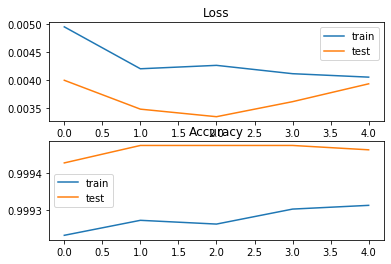

In [47]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# With SMOTEENN

In [48]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)

In [49]:
X_res, y_res = sme.fit_resample(X_reduced, y)

In [50]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.20, random_state=42)

# AdaBoost

In [51]:
# instantiate the model 
ada1 = AdaBoostClassifier(n_estimators=100, random_state=0)

ada1.fit(X_train, y_train)

y_pred = ada1.predict(X_test)

ada1_acc = accuracy_score(y_pred, y_test)
ada1_prec = precision_score(y_pred, y_test,average='weighted')
ada1_rec = recall_score(y_pred, y_test,average='weighted')
ada1_f1 = f1_score(y_pred, y_test,average='weighted')
ada1_sens = sensitivity_score(y_pred, y_test,average='weighted')
ada1_spec = specificity_score(y_pred, y_test,average='weighted')
ada1_roc = roc_auc_score(y_test, ada1.predict_proba(X_test)[:, 1])

In [86]:
storeResults1('AdaBoost',ada1_acc,ada1_prec,ada1_rec,ada1_f1,ada1_sens,ada1_spec,ada1_roc)

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
forest1 = RandomForestClassifier(max_depth=2, random_state=0)

forest1.fit(X_train, y_train)

y_pred = forest1.predict(X_test)

rf1_acc = accuracy_score(y_pred, y_test)
rf1_prec = precision_score(y_pred, y_test,average='weighted')
rf1_rec = recall_score(y_pred, y_test,average='weighted')
rf1_f1 = f1_score(y_pred, y_test,average='weighted')
rf1_sens = sensitivity_score(y_pred, y_test,average='weighted')
rf1_spec = specificity_score(y_pred, y_test,average='weighted')
rf1_roc = roc_auc_score(y_test, forest1.predict_proba(X_test)[:, 1])

In [87]:
storeResults1('Random Forest',rf1_acc,rf1_prec,rf1_rec,rf1_f1,rf1_sens,rf1_spec,rf1_roc)

# MLP

In [53]:
mlp1 = MLPClassifier(random_state=1, max_iter=30)

mlp1.fit(X_train, y_train)

y_pred = mlp1.predict(X_test)

mlp1_acc = accuracy_score(y_pred, y_test)
mlp1_prec = precision_score(y_pred, y_test,average='weighted')
mlp1_rec = recall_score(y_pred, y_test,average='weighted')
mlp1_f1 = f1_score(y_pred, y_test,average='weighted')
mlp1_sens = sensitivity_score(y_pred, y_test,average='weighted')
mlp1_spec = specificity_score(y_pred, y_test,average='weighted')
mlp1_roc = roc_auc_score(y_test, mlp1.predict_proba(X_test)[:, 1])

In [88]:
storeResults1('MLP',mlp1_acc,mlp1_prec,mlp1_rec,mlp1_f1,mlp1_sens,mlp1_spec,mlp1_roc)

# Stacking Classifier

In [54]:
estimators = [('rf', RandomForestClassifier(n_estimators=10)),('mlp', MLPClassifier(random_state=1, max_iter=30))]

clf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))


clf1.fit(X_train,y_train)

y_pred = clf1.predict(X_test)

stac1_acc = accuracy_score(y_pred, y_test)
stac1_prec = precision_score(y_pred, y_test,average='weighted')
stac1_rec = recall_score(y_pred, y_test,average='weighted')
stac1_f1 = f1_score(y_pred, y_test,average='weighted')
stac1_sens = sensitivity_score(y_pred, y_test,average='weighted')
stac1_spec = specificity_score(y_pred, y_test,average='weighted')
stac1_roc = roc_auc_score(y_test, clf1.predict_proba(X_test)[:, 1])

In [117]:
storeResults1('Stacking Classifier',stac1_acc,stac1_prec,stac1_rec,stac1_f1,stac1_sens,stac1_spec,stac1_roc)

# Voting Classifier

In [55]:
eclf2 = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')
eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)

vot1_acc = accuracy_score(y_pred, y_test)
vot1_prec = precision_score(y_pred, y_test,average='weighted')
vot1_rec = recall_score(y_pred, y_test,average='weighted')
vot1_f1 = f1_score(y_pred, y_test,average='weighted')
vot1_sens = sensitivity_score(y_pred, y_test,average='weighted')
vot1_spec = specificity_score(y_pred, y_test,average='weighted')
vot1_roc = roc_auc_score(y_test, eclf2.predict_proba(X_test)[:, 1])

In [118]:
storeResults1('Voting Classifier',vot1_acc,vot1_prec,vot1_rec,vot1_f1,vot1_sens,vot1_spec,vot1_roc)

DL

In [56]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_res)

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y_res, test_size=0.3)

In [58]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
train_X=X_train
val_X=X_test

In [59]:
## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))

In [60]:
## Recuperation des labels
train_y=y_train
val_y=y_test

# LSTM

In [61]:
inputs1=Input((1,11))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model2=Model(inputs1,outputs1)

In [62]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
history=model2.fit(train_X, train_y,epochs=5,batch_size=2, validation_data=(val_X, val_y))

Epoch 1/5
198769/198769 [==============================] - 774s 4ms/step - loss: 0.1767 - accuracy: 0.9323 - val_loss: 0.1268 - val_accuracy: 0.9496
Epoch 2/5
198769/198769 [==============================] - 765s 4ms/step - loss: 0.1469 - accuracy: 0.9404 - val_loss: 0.1166 - val_accuracy: 0.9479
Epoch 3/5
198769/198769 [==============================] - 789s 4ms/step - loss: 0.1346 - accuracy: 0.9448 - val_loss: 0.1130 - val_accuracy: 0.9556
Epoch 4/5
198769/198769 [==============================] - 787s 4ms/step - loss: 0.1309 - accuracy: 0.9474 - val_loss: 0.1289 - val_accuracy: 0.9536
Epoch 5/5
198769/198769 [==============================] - 790s 4ms/step - loss: 0.1262 - accuracy: 0.9487 - val_loss: 0.1510 - val_accuracy: 0.9457


In [64]:
# evaluate the model
_, train_acc = model2.evaluate(train_X, train_y, verbose=0)
_, test_acc = model2.evaluate(val_X, val_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.945, Test: 0.946


In [65]:
y_pred = model2.predict(val_X, verbose=1)
y_pred = np.argmax(y_pred,axis=1)
lstm1_acc = accuracy_score(y_pred, val_y)
lstm1_prec = precision_score(y_pred, val_y,average='weighted')
lstm1_rec = recall_score(y_pred, val_y,average='weighted')
lstm1_f1 = f1_score(y_pred, val_y,average='weighted')
lstm1_sens = sensitivity_score(y_pred, val_y,average='weighted')
lstm1_spec = specificity_score(y_pred, val_y,average='weighted')
lstm1_roc = roc_auc_score(train_y, model2.predict(train_X, verbose=1))

12424/12424 [==============================] - 13s 1ms/step


In [89]:
storeResults1('LSTM',lstm1_acc,lstm1_prec,lstm1_rec,lstm1_f1,lstm1_sens,lstm1_spec,lstm1_roc)

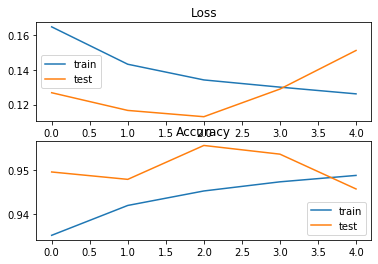

In [66]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# GRU

In [67]:
inputs1=Input((1,11))
att_in=GRU(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=GRU(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model2=Model(inputs1,outputs1)

In [68]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
history=model2.fit(train_X, train_y,epochs=5,batch_size=2, validation_data=(val_X, val_y))

Epoch 1/5
198769/198769 [==============================] - 732s 4ms/step - loss: 0.1789 - accuracy: 0.9313 - val_loss: 0.1493 - val_accuracy: 0.9392
Epoch 2/5
198769/198769 [==============================] - 722s 4ms/step - loss: 0.1441 - accuracy: 0.9417 - val_loss: 0.1353 - val_accuracy: 0.9553
Epoch 3/5
198769/198769 [==============================] - 722s 4ms/step - loss: 0.1380 - accuracy: 0.9434 - val_loss: 0.1853 - val_accuracy: 0.9217
Epoch 4/5
198769/198769 [==============================] - 721s 4ms/step - loss: 0.1336 - accuracy: 0.9460 - val_loss: 0.1954 - val_accuracy: 0.9261
Epoch 5/5
198769/198769 [==============================] - 726s 4ms/step - loss: 0.1302 - accuracy: 0.9472 - val_loss: 0.2397 - val_accuracy: 0.8739


In [70]:
# evaluate the model
_, train_acc = model2.evaluate(train_X, train_y, verbose=0)
_, test_acc = model2.evaluate(val_X, val_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.872, Test: 0.874


In [71]:
y_pred = model2.predict(val_X, verbose=1)
y_pred = np.argmax(y_pred,axis=1)
gru1_acc = accuracy_score(y_pred, val_y)
gru1_prec = precision_score(y_pred, val_y,average='weighted')
gru1_rec = recall_score(y_pred, val_y,average='weighted')
gru1_f1 = f1_score(y_pred, val_y,average='weighted')
gru1_sens = sensitivity_score(y_pred, val_y,average='weighted')
gru1_spec = specificity_score(y_pred, val_y,average='weighted')
gru1_roc = roc_auc_score(train_y, model2.predict(train_X, verbose=1))

12424/12424 [==============================] - 13s 1ms/step


In [90]:
storeResults1('GRU',gru1_acc,gru1_prec,gru1_rec,gru1_f1,gru1_sens,gru1_spec,gru1_roc)

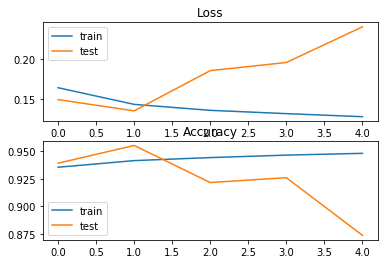

In [72]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# LSTM + GRU with ANN(MLP)

In [73]:
inputs1=Input((1,11))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=GRU(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs = Dense(8, activation='relu')(att_out)
outputs = Dense(6, activation='relu')(att_out)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model2=Model(inputs1,outputs1)
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
history=model2.fit(train_X, train_y,epochs=5,batch_size=2, validation_data=(val_X, val_y))

Epoch 1/5
198769/198769 [==============================] - 766s 4ms/step - loss: 0.1807 - accuracy: 0.9301 - val_loss: 0.1221 - val_accuracy: 0.9447
Epoch 2/5
198769/198769 [==============================] - 767s 4ms/step - loss: 0.1484 - accuracy: 0.9403 - val_loss: 0.1130 - val_accuracy: 0.9521
Epoch 3/5
198769/198769 [==============================] - 768s 4ms/step - loss: 0.1391 - accuracy: 0.9431 - val_loss: 0.1170 - val_accuracy: 0.9512
Epoch 4/5
198769/198769 [==============================] - 768s 4ms/step - loss: 0.1326 - accuracy: 0.9457 - val_loss: 0.1212 - val_accuracy: 0.9585
Epoch 5/5
198769/198769 [==============================] - 769s 4ms/step - loss: 0.1288 - accuracy: 0.9472 - val_loss: 0.1325 - val_accuracy: 0.9533


In [75]:
# evaluate the model
_, train_acc = model2.evaluate(train_X, train_y, verbose=0)
_, test_acc = model2.evaluate(val_X, val_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.952, Test: 0.953


In [76]:
y_pred = model2.predict(val_X, verbose=1)
y_pred = np.argmax(y_pred,axis=1)
ense1_acc = accuracy_score(y_pred, val_y)
ense1_prec = precision_score(y_pred, val_y,average='weighted')
ense1_rec = recall_score(y_pred, val_y,average='weighted')
ense1_f1 = f1_score(y_pred, val_y,average='weighted')
ense1_sens = sensitivity_score(y_pred, val_y,average='weighted')
ense1_spec = specificity_score(y_pred, val_y,average='weighted')
ense1_roc = roc_auc_score(train_y, model2.predict(train_X, verbose=1))

12424/12424 [==============================] - 13s 1ms/step


In [91]:
storeResults1('LSTM + GRU with ANN(MLP Layer)',ense1_acc,ense1_prec,ense1_rec,ense1_f1,ense1_sens,ense1_spec,ense1_roc)

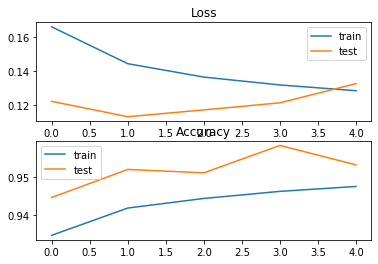

In [77]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Comparison

# Without SMOTEENN

In [119]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score,
                        'Sensitivity' : sens,
                       'Specificity' : spec,
                       'AUC' : rocauc
                      })

In [120]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score,Sensitivity,Specificity,AUC
0,AdaBoost,0.999,0.999,0.999,0.999,0.999,0.872,0.983
1,Random FOrest,0.999,0.999,0.999,0.999,0.999,0.855,0.927
2,MLP,0.999,0.999,0.999,0.999,0.999,0.855,0.982
3,LSTM,0.998,1.000,0.998,0.999,0.998,0.000,0.971
4,GRU,0.998,1.000,0.998,0.999,0.998,0.000,0.951
5,LSTM + GRU with ANN(MLP Layer),0.998,1.000,0.998,0.999,0.998,0.000,0.957
6,Stacking Classifier,1.000,0.999,0.999,0.999,0.999,0.806,0.932
7,Voting Classifier,1.000,1.000,1.000,1.000,1.000,0.975,0.983


# Modelling

In [139]:
import joblib
filename = 'model1.sav'
filename1 = 'model2.sav'
joblib.dump(clf, filename)
joblib.dump(eclf1, filename1)

['model2.sav']

# Graph

In [121]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

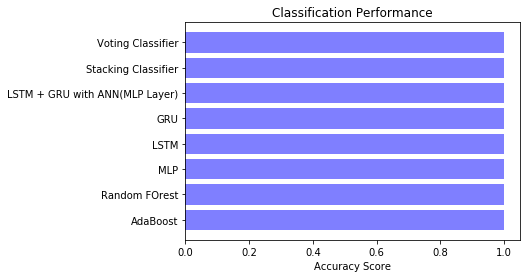

In [122]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

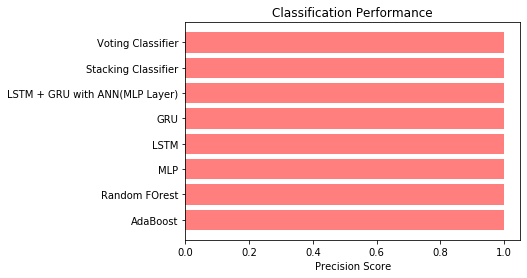

In [123]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

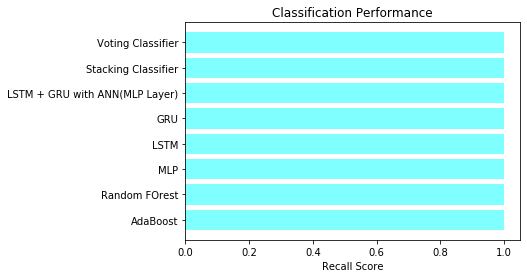

In [124]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

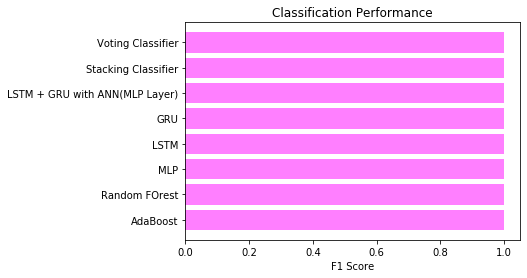

In [125]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Sensitivity

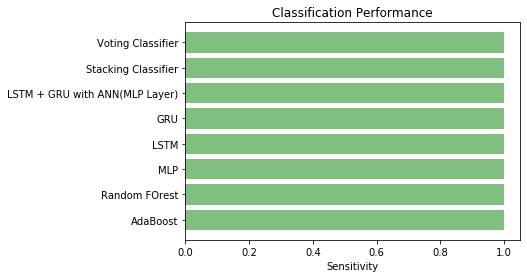

In [126]:
plt2.barh(y_pos, sens, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Sensitivity')
plt2.title('Classification Performance')
plt2.show()

# Specificity

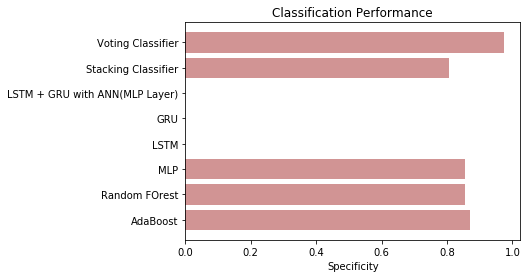

In [127]:
plt2.barh(y_pos, spec, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity')
plt2.title('Classification Performance')
plt2.show()

# ROC AUC

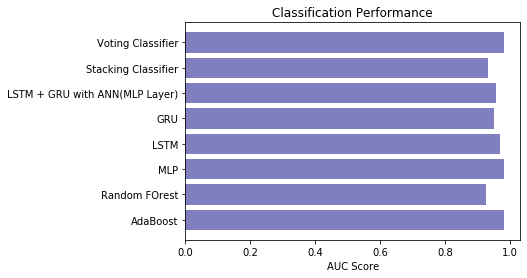

In [128]:
plt2.barh(y_pos, rocauc, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC Score')
plt2.title('Classification Performance')
plt2.show()

# With SMOTEENN

In [129]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model1,
                        'Accuracy' : accuracy1,
                        'Precision': precision1,
                        'Recall'   : recall1,
                        'F1-Score': f1score1,
                        'Sensitivity' : sens1,
                       'Specificity' : spec1,
                       'AUC' : rocauc1
                      })

In [130]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score,Sensitivity,Specificity,AUC
0,AdaBoost,0.952,0.953,0.952,0.952,0.952,0.954,0.993
1,Random Forest,0.931,0.938,0.931,0.931,0.931,0.944,0.969
2,MLP,0.999,0.999,0.999,0.999,0.999,0.999,1.000
3,LSTM,0.499,1.000,0.499,0.666,0.499,0.000,0.990
4,GRU,0.499,1.000,0.499,0.666,0.499,0.000,0.990
5,LSTM + GRU with ANN(MLP Layer),0.499,1.000,0.499,0.666,0.499,0.000,0.990
6,Stacking Classifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7,Voting Classifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000


# Graph

In [131]:
classifier = ML_Model1
y_pos = np.arange(len(classifier))

# Accuracy

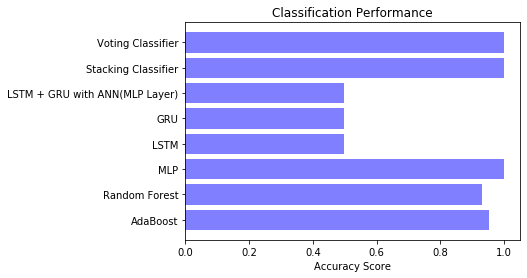

In [132]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

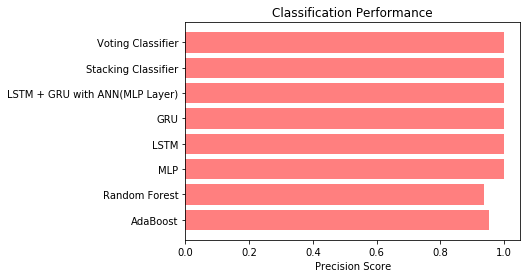

In [133]:
plt2.barh(y_pos, precision1, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

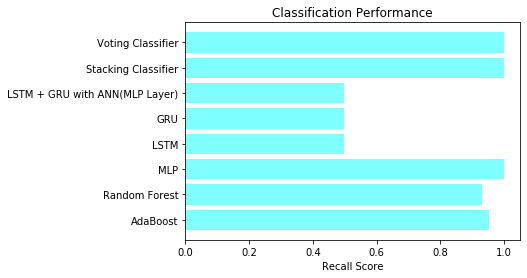

In [134]:
plt2.barh(y_pos, recall1, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 SCore

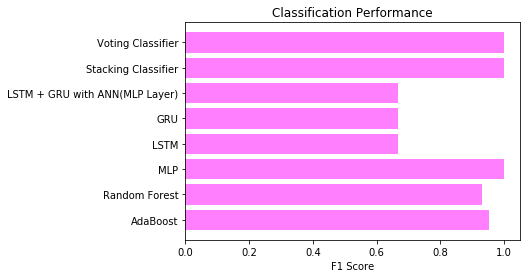

In [135]:
plt2.barh(y_pos, f1score1, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Sensitivity

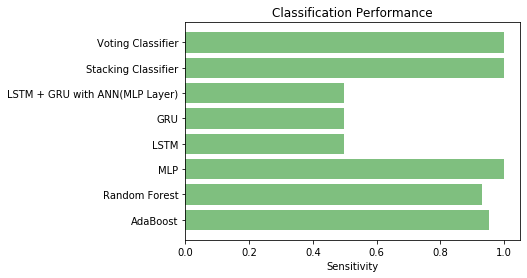

In [136]:
plt2.barh(y_pos, sens1, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Sensitivity')
plt2.title('Classification Performance')
plt2.show()

# Specificity

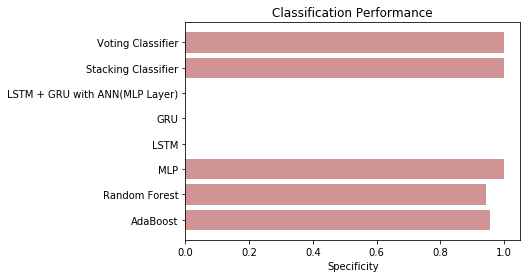

In [137]:
plt2.barh(y_pos, spec1, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity')
plt2.title('Classification Performance')
plt2.show()

# ROC AUC

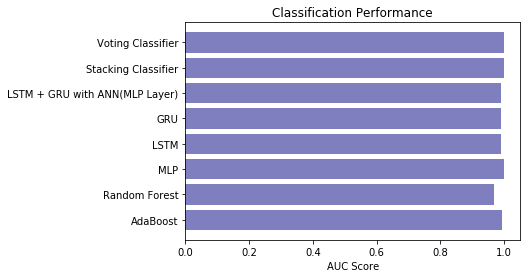

In [138]:
plt2.barh(y_pos, rocauc1, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC Score')
plt2.title('Classification Performance')
plt2.show()